In [1]:
import pandas as pd
from sodapy import Socrata

In [55]:
client = Socrata("data.cityofchicago.org", "5pRncwUCiA5yTnxlIJySqPOfW")

In [56]:
results = client.get("6iiy-9s97")
results_df = pd.DataFrame.from_records(results)

In [58]:
results_df

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01T00:00:00.000,U,297192,126455,423647
1,2001-01-02T00:00:00.000,W,780827,501952,1282779
2,2001-01-03T00:00:00.000,W,824923,536432,1361355
3,2001-01-04T00:00:00.000,W,870021,550011,1420032
4,2001-01-05T00:00:00.000,W,890426,557917,1448343
...,...,...,...,...,...
995,2003-09-23T00:00:00.000,W,1023379,655433,1678812
996,2003-09-24T00:00:00.000,W,973736,643836,1617572
997,2003-09-25T00:00:00.000,W,1006367,648354,1654721
998,2003-09-26T00:00:00.000,W,939175,643987,1583162


In [2]:
ridership_df = pd.read_csv(
    "../cta-ridership-totals.csv",
    parse_dates=["service_date"]
    )

In [6]:
ridership_df

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343
...,...,...,...,...,...
8823,2024-12-27,W,394689,245475,640164
8824,2024-12-28,A,348599,222891,571490
8825,2024-12-29,U,231003,158657,389660
8826,2024-12-30,W,447644,285475,733119


<Axes: xlabel='service_date'>

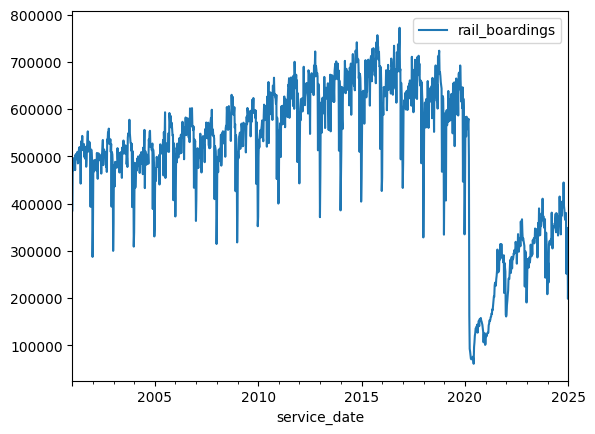

In [28]:
ridership_df[["rail_boardings"]].resample("W").mean().plot()

In [10]:
cutoff = "2020-03-01"
end_date = "2020-01-01"
start_date = "2018-12-31"

<Axes: xlabel='service_date'>

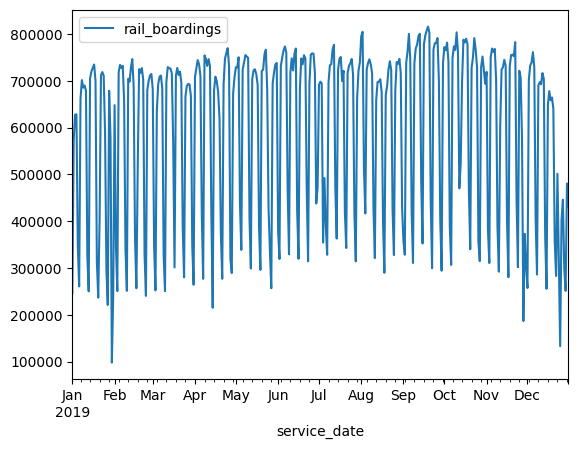

In [12]:
(ridership_df.query("@start_date < service_date < @end_date")
             .set_index("service_date")[["rail_boardings"]]
             #.resample("W").mean()
             .plot()
 )

In [13]:
ridership_df.query("@start_date < service_date < @end_date")

,service_date,day_type,bus,rail_boardings,total_rides
6636,2019-01-01,U,248879,245852,494731
6637,2019-01-02,W,591006,573542,1164548
6638,2019-01-03,W,664442,627781,1292223
6639,2019-01-04,W,668812,628514,1297326
6640,2019-01-05,A,444434,348257,792691
...,...,...,...,...,...
7069,2019-12-27,W,552198,445835,998033
7070,2019-12-28,A,394869,298646,693515
7071,2019-12-29,U,315428,251105,566533
7072,2019-12-30,W,544713,480721,1025434


In [14]:
weekday_service = ridership_df.loc[ridership_df["day_type"] == "W",]

<Axes: xlabel='service_date'>

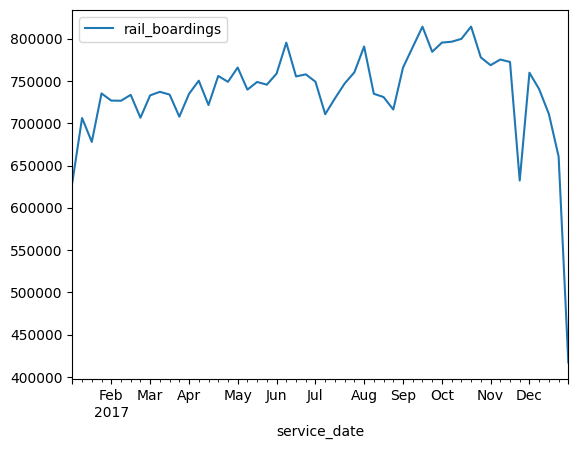

In [20]:
cutoff = "2020-03-01"
end_date = "2018-01-01"
start_date = "2016-12-31"
(weekday_service.query("@start_date < service_date < @end_date")
             .set_index("service_date")[["rail_boardings"]]
             .resample("W").mean()
             .plot()
 )

In [24]:
ridership_df

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343
...,...,...,...,...,...
8823,2024-12-27,W,394689,245475,640164
8824,2024-12-28,A,348599,222891,571490
8825,2024-12-29,U,231003,158657,389660
8826,2024-12-30,W,447644,285475,733119


/var/folders/5k/jthrmhld0q919b4jn2g5mzs00000gn/T/ipykernel_84708/61734980.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").mean()


<Axes: xlabel='service_date'>

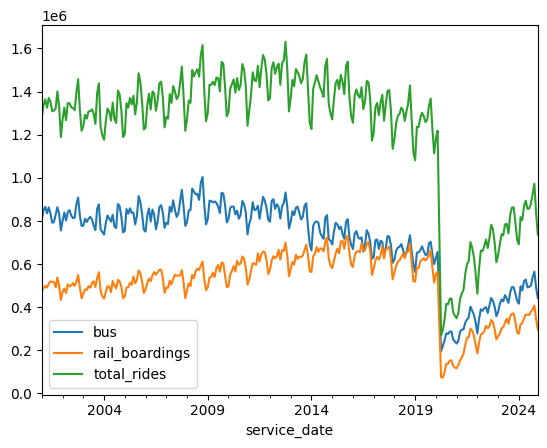

In [28]:
(
    ridership_df.set_index("service_date")
                .drop("day_type", axis="columns")
                .resample("M").mean()
                .plot()
)

/var/folders/5k/jthrmhld0q919b4jn2g5mzs00000gn/T/ipykernel_84708/120045112.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").mean()


<Axes: xlabel='service_date'>

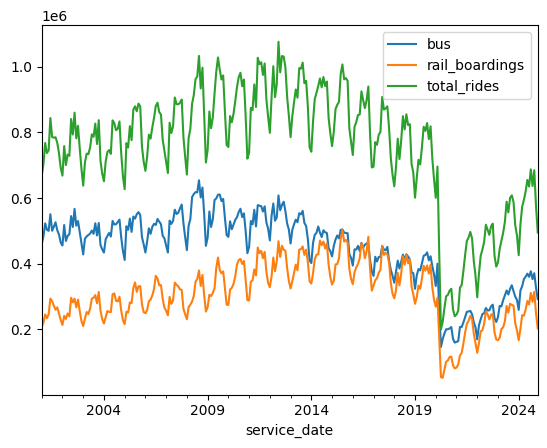

In [33]:
(
    ridership_df.set_index("service_date")
                .query("day_type != 'W'")
                .drop("day_type", axis="columns")
                .resample("M").mean()
                .plot()
)

Initial exploration demonstrates that to compare ridership numbers from different time periods, we must take into account time of the year. It appears that ridership goes down during holidays and peaks in summer.

<Axes: xlabel='service_date'>

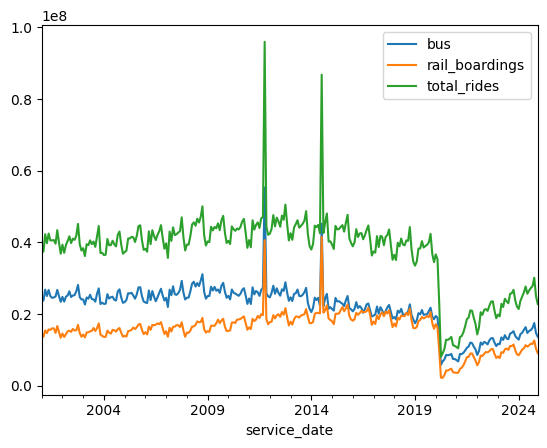

In [40]:
(
    ridership_df.set_index("service_date")
                .drop("day_type", axis="columns")
                .resample("ME").sum()
                .plot()
)

In [41]:
(
    ridership_df.set_index("service_date")
                .drop("day_type", axis="columns")
                .resample("ME").sum()
                .sort_values("total_rides")
)

,bus,rail_boardings,total_rides
service_date,,,
2020-04-30,5851652,2266610,8118262
2020-05-31,6822849,2235078,9057927
2020-06-30,7331691,2955135,10286826
2021-02-28,6807111,3652181,10459292
2021-01-31,7156782,3628861,10785643
...,...,...,...
2013-10-31,27333109,21394658,48727767
2008-10-31,31132959,18947473,50080432
2012-10-31,28893005,21669022,50562027


In [46]:
(
    ridership_df.query("'2011-10-31' >= service_date >= '2011-10-01'")
                .set_index("service_date")
                .drop("day_type", axis="columns").to_clipboard()
)

In [ ]:
service_date	bus	rail_boardings	total_rides
2011-10-01	701783	480889	1182672
2011-10-02	486409	344520	830929
2011-10-03	1091676	751034	1842710
2011-10-04	1090878	767029	1857907
2011-10-05	1083300	774142	1857442
2011-10-06	1076741	783363	1860104
2011-10-07	1074577	783590	1858167
2011-10-08	692368	523113	1215481
2011-10-09	463310	519453	982763
2011-10-10	857528	669173	1526701
2011-10-11	1073195	770542	1843737
2011-10-12	1068602	776561	1845163
2011-10-13	1011085	773498	1784583
2011-10-14	1058024	783903	1841927
2011-10-15	686909	508391	1195300
2011-10-16	457725	351070	808795
2011-10-17	1060560	752887	1813447
2011-10-18	1054603	759917	1814520
2011-10-19	987878	738984	1726862
2011-10-20	1019401	763556	1782957
2011-10-21	1072848	782981	1855829
2011-10-22	678136	497703	1175839
2011-10-23	476507	341626	818133
2011-10-24	1054251	747402	1801653
2011-10-25	1066867	757975	1824842
2011-10-26	1055199	756804	1812003
2011-10-27	1061301	771358	1832659
2011-10-28	993735	758294	1752029
2011-10-29	665331	469295	1134626
2011-10-30	433281	318565	751846
2011-10-31	1027078	734500	1761578
2011-10-01	701783	480889	1182672
2011-10-02	486409	344520	830929
2011-10-03	1091676	751034	1842710
2011-10-04	1090878	767029	1857907
2011-10-05	1083300	774142	1857442
2011-10-06	1076741	783363	1860104
2011-10-07	1074577	783590	1858167
2011-10-08	692368	523113	1215481
2011-10-09	463310	519453	982763
2011-10-10	857528	669173	1526701
2011-10-11	1073195	770542	1843737
2011-10-12	1068602	776561	1845163
2011-10-13	1011085	773498	1784583
2011-10-14	1058024	783903	1841927
2011-10-15	686909	508391	1195300
2011-10-16	457725	351070	808795
2011-10-17	1060560	752887	1813447
2011-10-18	1054603	759917	1814520
2011-10-19	987878	738984	1726862
2011-10-20	1019401	763556	1782957
2011-10-21	1072848	782981	1855829
2011-10-22	678136	497703	1175839
2011-10-23	476507	341626	818133
2011-10-24	1054251	747402	1801653
2011-10-25	1066867	757975	1824842
2011-10-26	1055199	756804	1812003
2011-10-27	1061301	771358	1832659
2011-10-28	993735	758294	1752029
2011-10-29	665331	469295	1134626
2011-10-30	433281	318565	751846
2011-10-31	1027078	734500	1761578


In [47]:
ridership_df

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343
...,...,...,...,...,...
8823,2024-12-27,W,394689,245475,640164
8824,2024-12-28,A,348599,222891,571490
8825,2024-12-29,U,231003,158657,389660
8826,2024-12-30,W,447644,285475,733119


In [48]:
23*365

8395

In [ ]:
ridership_df.loc[
    ridership_df[["service_date"]].duplicated()
]

,service_date,day_type,bus,rail_boardings,total_rides
3957,2011-10-01,A,701783,480889,1182672
3958,2011-10-02,U,486409,344520,830929
3959,2011-10-03,W,1091676,751034,1842710
3960,2011-10-04,W,1090878,767029,1857907
3961,2011-10-05,W,1083300,774142,1857442
...,...,...,...,...,...
5200,2014-07-07,W,821674,704301,1525975
5201,2014-07-28,W,810122,730188,1540310
5203,2014-07-31,W,819409,785640,1605049
5204,2014-07-16,W,844384,752925,1597309


In [ ]:
ridership_df = ridership_df.loc[~ridership_df.duplicated()].reset_index()

In [67]:
ridership_df = (
    ridership_df.drop("index", axis="columns")
                .rename({
                    "rail_boardings" : "rail",
                    "total_rides" : "total",
                    "service_date" : "date"
                }, axis="columns")
    )



In [71]:
ridership_df.to_csv("../data/cta-ridership-clean.csv", index=False)

In [70]:
!pwd

/Users/sardorgulyamov/Desktop/city-data-projects/city/notebooks
